In [14]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

In [9]:
with open('kdv_long_dS-1_ic-u_fineTune_log.pickle', 'rb') as handle:
    sd_data = pickle.load(handle)
with open('kdv_long_uniform_width=dt_bc-set=on_null-set=on_trial2_log.pickle', 'rb') as handle:
    ws_data = pickle.load(handle)
with open('kdv_long_s-d+w-s_log.pickle', 'rb') as handle:
    sdws_data = pickle.load(handle)

In [15]:
pw_error_sd = abs(sd_data['u_pred_decomp'] - sd_data['u_test_decomp'])
triang_sd = tri.Triangulation(sd_data['t_decomp'], sd_data['x_decomp']) 
pw_error_ws = abs(ws_data['u_pred_decomp'] - ws_data['u_test_decomp'])
triang_ws = tri.Triangulation(ws_data['t_decomp'], ws_data['x_decomp']) 
pw_error_sdws = abs(sdws_data['u_pred_decomp'] - sdws_data['u_test_decomp'])
triang_sdws = tri.Triangulation(sdws_data['t_decomp'], sdws_data['x_decomp']) 

In [63]:
pw_error_all = np.concatenate((pw_error_sd, pw_error_ws, pw_error_sdws))
vmin = min(pw_error_all); vmax = max(pw_error_all); 
fontsize = 20

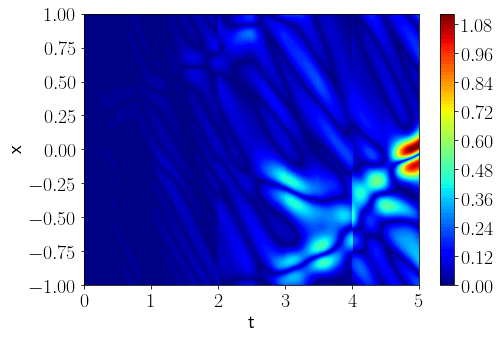

In [72]:
### Get colorbar
plt.rcParams['text.usetex'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.figure(figsize=(7.5,5))
plt.tricontourf(triang_sd, pw_error_sd, 100 ,cmap='jet', vmin = vmin, vmax = vmax)
plt.ylabel('x', fontsize = fontsize); plt.xlabel('t', fontsize = fontsize); plt.yticks(fontsize = fontsize); plt.xticks(fontsize = fontsize)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(fontsize = 20)
    
plt.savefig('kdv_long_pointWise_error_colorbar', dpi = 300, bbox_inches='tight')

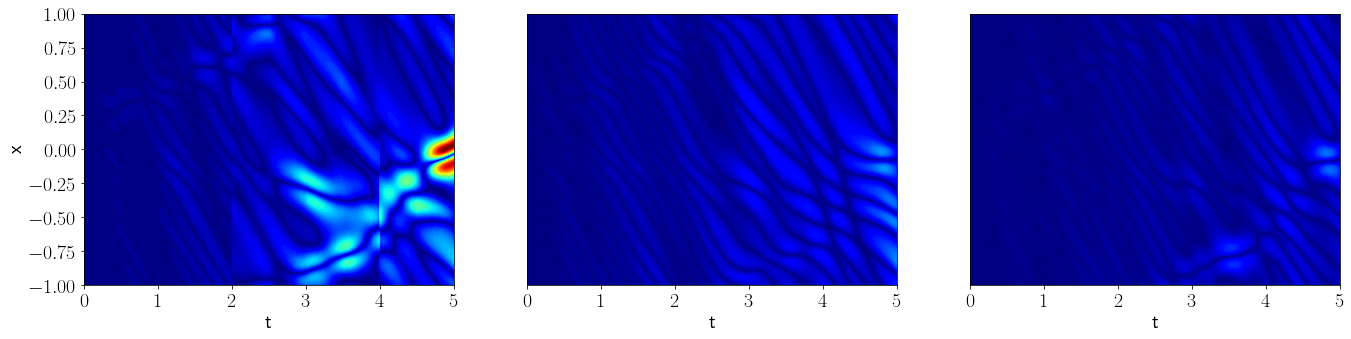

In [71]:
plt.rcParams['text.usetex'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.figure(figsize=(22.5,5))
plt.subplot(1, 3, 1)
plt.tricontourf(triang_sd, pw_error_sd, 100 ,cmap='jet', vmin = vmin, vmax = vmax)
plt.ylabel('x', fontsize = fontsize); plt.xlabel('t', fontsize = fontsize); plt.yticks(fontsize = fontsize); plt.xticks(fontsize = fontsize)

plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

plt.subplot(1, 3, 2)
plt.tricontourf(triang_ws, pw_error_ws, 100 ,cmap='jet', vmin = vmin, vmax = vmax)
plt.xlabel('t', fontsize = fontsize); plt.xticks(fontsize = fontsize)

plt.subplot(1, 3, 3)
plt.tricontourf(triang_sdws, pw_error_sdws, 100 ,cmap='jet', vmin = vmin, vmax = vmax)
plt.xlabel('t', fontsize = fontsize);  plt.xticks(fontsize = fontsize)

plt.savefig('kdv_long_pointWise_errors', dpi = 300, bbox_inches='tight')